In [1]:
import numpy as np
import pandas as pd
import sklearn
import glob
import os 
#getting data 

os.chdir("ETFs")

#create a dataframe of all of ETFs
etf_filenames = glob.glob("*.us.csv")
etf_dfs = []
index_of_exceptions = []
for i in range(len(etf_filenames)):
    try:
        etf_dfs.append(pd.read_csv(etf_filenames[i]))
    except:
        index_of_exceptions.append(i)
        pass
for i in index_of_exceptions:
    etf_filenames.pop(i)
#match etf data to its filename and create a column of ETFnames
for dataframe, filename in zip(etf_dfs, etf_filenames):
     dataframe["ETFName"] = filename.split(".us.csv")[0]
all_etfs = pd.concat(etf_dfs, ignore_index=True)

#OpenInt values are all 0 so get rid of them 
all_etfs.drop(['OpenInt'], axis = 1)

,Date,Open,High,Low,Close,Volume,ETFName
0,2011-04-05,48.5340,48.5880,48.4440,48.4600,4122,mchi
1,2011-04-06,48.7770,48.9600,48.5610,48.7060,5079,mchi
2,2011-04-07,48.8250,48.8970,48.4340,48.6170,8069,mchi
3,2011-04-08,49.0050,49.0050,48.5430,48.7330,6869,mchi
4,2011-04-11,48.8150,48.8880,48.0080,48.0170,20297,mchi
5,2011-04-12,47.7080,47.8440,47.4090,47.6810,7880,mchi
6,2011-04-13,48.2530,48.2530,47.9450,48.1610,2135,mchi
7,2011-04-14,48.1610,48.3960,48.0890,48.3070,5150,mchi
8,2011-04-15,48.5050,48.6420,48.2340,48.6420,10638,mchi
9,2011-04-18,47.7180,47.9260,47.3900,47.8790,2058,mchi


Text(0.5,1,'DON Close Price 120 Days')

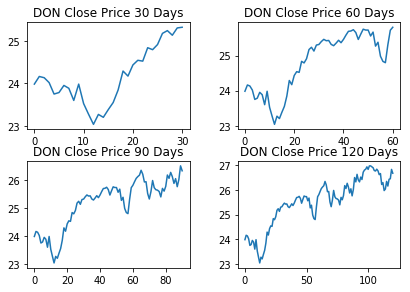

In [9]:
import matplotlib.pyplot as plt
import numpy as np
#DON ETF plot for all data at 30 day, 60 day, 90 day, 120 day intervals (from an initial date chosen randomly) and all dates 
fig, plotarr = plt.subplots(2, 2)
fig.tight_layout()

#Get DON close prices, total number of days
don_close = all_etfs[all_etfs.ETFName =='don'].Close.values
num_days = len(don_close)

#DON ETF shorter periods(30, 60, 90, 120 days), with initial start date chosen at random
#start_date_generator = np.random.randint(np.random.randint(num_days - 121))
start_date = 2082
#30 days
don_close_30 = don_close[start_date: start_date + 31]
plotarr[0,0].plot(don_close_30)
plotarr[0, 0].set_title('DON Close Price 30 Days')

 #60 days

don_close_60 = don_close[start_date: start_date + 61]
plotarr[0, 1].plot(don_close_60)
plotarr[0, 1].set_title('DON Close Price 60 Days')

#90 days

don_close_90 = don_close[start_date: start_date + 91]
plotarr[1, 0].plot(don_close_90)
plotarr[1, 0].set_title('DON Close Price 90 Days')


#120 days 
don_close_120 = don_close[start_date: start_date + 121]
plotarr[1, 1].plot(don_close_120)
plotarr[1,1].set_title('DON Close Price 120 Days')





Text(0,0.5,'price')

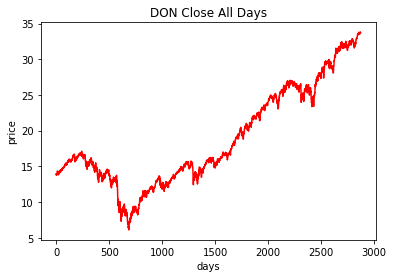

In [3]:
#Entire dataset plot 
plt.subplot()
plt.plot(don_close, color = 'red', label = 'open')
plt.title('DON Close All Days')
plt.xlabel('days')
plt.ylabel('price')


In [4]:
#Apply Augmented Dickey-Fuller test to whole data set to see test stationarity 
#(though from the graphs, seasonality and trends are usually obvious)

from statsmodels.tsa.stattools import adfuller
dickey_fuller = adfuller(don_close, autolag='AIC')
df_results_all = pd.Series(dickey_fuller[0:4], index=['test statistic', 'p-value', '# of lags', '# of observations'])
for key, value in dickey_fuller[4].items():
        df_results_all['Critical Value ({})'.format(key)] = value
print("All data results")
print(df_results_all)

#Augmented Dickey Fuller Function For any Dataset
def adf_test(dataset):
    dickey_fuller = adfuller(dataset, autolag='AIC')
    df_results = pd.Series(dickey_fuller[0:4], index=['test statistic', 'p-value', '# of lags', '# of observations'])
    for key, value in dickey_fuller[4].items():
        df_results['Critical Value ({})'.format(key)] = value
    return df_results
print("ADF test 30 days")
print(adf_test(don_close_30))
print("ADF test 60 days")
print(adf_test(don_close_60))
print("ADF test 90 days")
print(adf_test(don_close_90))
print("ADF test 120 days")
print(adf_test(don_close_120))

#Dickey Fuller indicates the data is nonstationary

All data results
test statistic             0.889982
p-value                    0.992958
# of lags                  5.000000
# of observations       2866.000000
Critical Value (1%)       -3.432634
Critical Value (5%)       -2.862549
Critical Value (10%)      -2.567307
dtype: float64
ADF test 30 days
test statistic          -0.018622
p-value                  0.956965
# of lags                0.000000
# of observations       30.000000
Critical Value (1%)     -3.669920
Critical Value (5%)     -2.964071
Critical Value (10%)    -2.621171
dtype: float64
ADF test 60 days
test statistic          -0.917624
p-value                  0.782113
# of lags                2.000000
# of observations       58.000000
Critical Value (1%)     -3.548494
Critical Value (5%)     -2.912837
Critical Value (10%)    -2.594129
dtype: float64
ADF test 90 days
test statistic          -1.165978
p-value                  0.688057
# of lags                0.000000
# of observations       90.000000
Critical Value (1%)    

/Users/duncanhaystead/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


ADF after log transformation
30 days
test statistic          -0.061751
p-value                  0.953118
# of lags                0.000000
# of observations       30.000000
Critical Value (1%)     -3.669920
Critical Value (5%)     -2.964071
Critical Value (10%)    -2.621171
dtype: float64
60 days
test statistic          -0.924410
p-value                  0.779828
# of lags                2.000000
# of observations       58.000000
Critical Value (1%)     -3.548494
Critical Value (5%)     -2.912837
Critical Value (10%)    -2.594129
dtype: float64
90 days
test statistic          -1.170283
p-value                  0.686247
# of lags                0.000000
# of observations       90.000000
Critical Value (1%)     -3.505190
Critical Value (5%)     -2.894232
Critical Value (10%)    -2.584210
dtype: float64
120 days
test statistic           -1.709911
p-value                   0.426014
# of lags                 4.000000
# of observations       116.000000
Critical Value (1%)      -3.488022
Crit

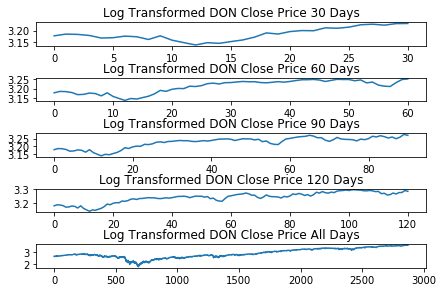

In [7]:
#Transform data to remove trend 
#transform by log
close_30_days_log = np.log(don_close_30)
close_60_days_log = np.log(don_close_60)
close_90_days_log = np.log(don_close_90)
close_120_days_log = np.log(don_close_120)
close_all_days_log = np.log(don_close)
#plot log data
fig, plotlog = plt.subplots(5, 1)
fig.tight_layout()
plotlog[0].plot(close_30_days_log)
plotlog[0].set_title('Log Transformed DON Close Price 30 Days')
plotlog[1].plot(close_60_days_log)
plotlog[1].set_title('Log Transformed DON Close Price 60 Days')
plotlog[2].plot(close_90_days_log)
plotlog[2].set_title('Log Transformed DON Close Price 90 Days')
plotlog[3].plot(close_120_days_log)
plotlog[3].set_title('Log Transformed DON Close Price 120 Days')
plotlog[4].plot(close_all_days_log)
plotlog[4].set_title('Log Transformed DON Close Price All Days')
print("ADF after log transformation")
print("30 days")
print(adf_test(close_30_days_log ))
print("60 days")
print(adf_test(close_60_days_log ))
print("90 days")
print(adf_test(close_90_days_log ))
print("120 days")
print(adf_test(close_120_days_log ))
print("all days")
print(adf_test(close_all_days_log ))
#note the moderate improvements 


30 days
test statistic          -5.452657
p-value                  0.000003
# of lags                0.000000
# of observations       29.000000
Critical Value (1%)     -3.679060
Critical Value (5%)     -2.967882
Critical Value (10%)    -2.623158
dtype: float64
60 days
test statistic         -7.263301e+00
p-value                 1.659784e-10
# of lags               0.000000e+00
# of observations       5.900000e+01
Critical Value (1%)    -3.546395e+00
Critical Value (5%)    -2.911939e+00
Critical Value (10%)   -2.593652e+00
dtype: float64
90 days
test statistic         -9.325505e+00
p-value                 9.635195e-16
# of lags               0.000000e+00
# of observations       8.900000e+01
Critical Value (1%)    -3.506057e+00
Critical Value (5%)    -2.894607e+00
Critical Value (10%)   -2.584410e+00
dtype: float64
120 days
test statistic           -5.455933
p-value                   0.000003
# of lags                 3.000000
# of observations       116.000000
Critical Value (1%)      -

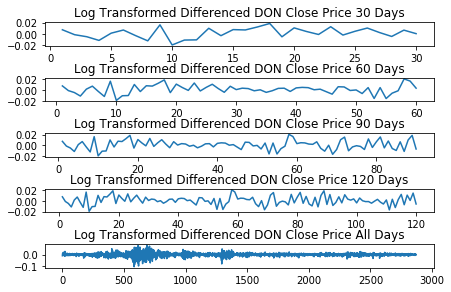

In [8]:
#Difference data to remove seasonality
#ADF for dataframes 
def adf_dataframe(timeseries):
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    return dfoutput
#First convert to dataframes to use pandas tools
df_close_30_days_log = pd.DataFrame(close_30_days_log)
df_close_60_days_log = pd.DataFrame(close_60_days_log)
df_close_90_days_log = pd.DataFrame(close_90_days_log)
df_close_120_days_log = pd.DataFrame(close_120_days_log)
df_close_all_days_log = pd.DataFrame(close_all_days_log)
#Difference data, drop NaN values
df_close_30_days_log_diff = (df_close_30_days_log - df_close_30_days_log.shift()).dropna()
df_close_60_days_log_diff = (df_close_60_days_log - df_close_60_days_log.shift()).dropna()
df_close_90_days_log_diff = (df_close_90_days_log - df_close_90_days_log.shift()).dropna()
df_close_120_days_log_diff = (df_close_120_days_log - df_close_120_days_log.shift()).dropna()
df_close_all_days_log_diff = (df_close_all_days_log - df_close_all_days_log.shift()).dropna()
#plot log difference data
fig, plotlogdiff = plt.subplots(5, 1)
fig.tight_layout()
plotlogdiff[0].plot(df_close_30_days_log_diff)
plotlogdiff[0].set_title('Log Transformed Differenced DON Close Price 30 Days')
plotlogdiff[1].plot(df_close_60_days_log_diff)
plotlogdiff[1].set_title('Log Transformed Differenced DON Close Price 60 Days')
plotlogdiff[2].plot(df_close_90_days_log_diff)
plotlogdiff[2].set_title('Log Transformed Differenced DON Close Price 90 Days')
plotlogdiff[3].plot(df_close_120_days_log_diff)
plotlogdiff[3].set_title('Log Transformed Differenced DON Close Price 120 Days')
plotlogdiff[4].plot(df_close_all_days_log_diff)
plotlogdiff[4].set_title('Log Transformed Differenced DON Close Price All Days')


print("30 days")
print(adf_test(np.array(df_close_30_days_log_diff.values).reshape(1, -1)[0]))
print("60 days")
print(adf_test(np.array(df_close_60_days_log_diff.values).reshape(1, -1)[0]))
print("90 days")
print(adf_test(np.array(df_close_90_days_log_diff.values).reshape(1, -1)[0]))
print("120 days")
print(adf_test(np.array(df_close_120_days_log_diff.values).reshape(1, -1)[0]))
print("all days")
print(adf_test(np.array(df_close_all_days_log_diff.values).reshape(1, -1)[0]))
#ADF is now much nicer, indicating the data is now stationary